In [30]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Load Dataset
data = pd.read_csv('Bangalore_house_price_dataset.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   size          13303 non-null  object 
 4   society       13303 non-null  object 
 5   total_sqft    13303 non-null  object 
 6   bath          13246 non-null  float64
 7   balcony       12710 non-null  float64
 8   price         13303 non-null  float64
dtypes: float64(3), object(6)
memory usage: 935.5+ KB


In [32]:
data.describe()

,bath,balcony,price
count,13246.000000,12710.000000,13303.000000
mean,2.692586,1.584343,112.584033
std,1.341506,0.817287,148.993820
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [21]:
print(data.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [33]:
# Step 3: Data Cleaning
# Fill missing values for numerical columns with their mean
data['bath'] = data['bath'].fillna(round(data['bath'].mean())).astype(int)
data['balcony'] = data['balcony'].fillna(round(data['balcony'].mean())).astype(int)

# Convert size to numeric (extract the number of bedrooms)
data['BHK'] = data['size'].str.extract('(\d+)').astype(int)

# Process total_sqft to handle ranges (e.g., "1200-1300" -> average)
def process_sqft(x):
    if '-' in str(x):
        vals = x.split('-')
        return (float(vals[0]) + float(vals[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None
data['total_sqft'] = data['total_sqft'].apply(process_sqft)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13303 entries, 0 to 13302
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   size          13303 non-null  object 
 4   society       13303 non-null  object 
 5   total_sqft    13257 non-null  float64
 6   bath          13303 non-null  int64  
 7   balcony       13303 non-null  int64  
 8   price         13303 non-null  float64
 9   BHK           13303 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [35]:
data.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,46
bath,0
balcony,0
price,0
BHK,0


Training Metrics:
R²: 0.95, RMSE: 34.93, MSE: 1220.23

Testing Metrics:
R²: 0.70, RMSE: 81.44, MSE: 6632.61


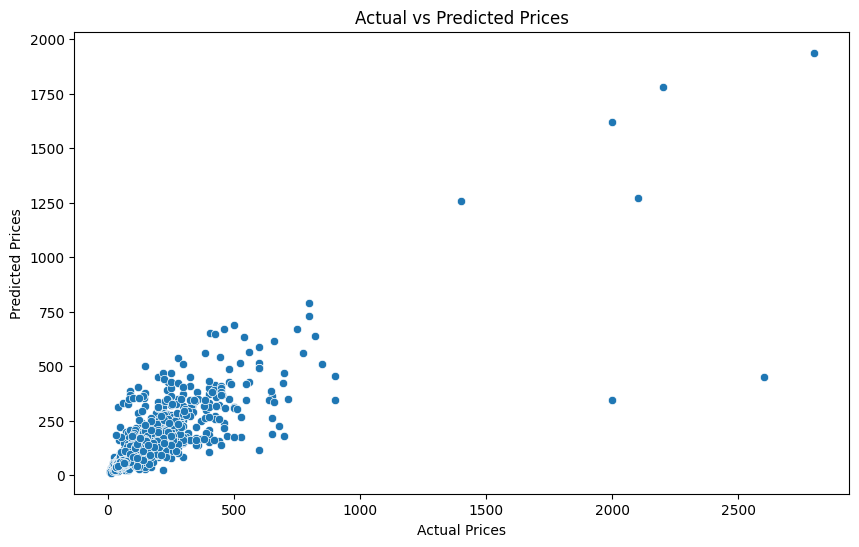

In [36]:


# Drop rows with missing total_sqft
data = data.dropna(subset=['total_sqft'])

# Encode categorical variables
# Ensure the column names used in get_dummies match the DataFrame:
categorical_cols = ['area_type', 'availability', 'location', 'society']
for col in categorical_cols:
    if col not in data.columns:
        print(f"Column '{col}' not found in DataFrame")
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 4: Define Features and Target
X = data.drop(['price', 'size'], axis=1)
y = data['price']

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate Model
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

# Calculate RMSE using NumPy's sqrt function
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))


train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# Print Metrics
print("Training Metrics:")
print(f"R²: {train_r2:.2f}, RMSE: {train_rmse:.2f}, MSE: {train_mse:.2f}")

print("\nTesting Metrics:")
print(f"R²: {test_r2:.2f}, RMSE: {test_rmse:.2f}, MSE: {test_mse:.2f}")

# Step 8: Visualize Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=test_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
# Step 2: Load Dataset
data = pd.read_csv('Bangalore_house_price_dataset.csv')
# Fill missing values for numerical columns with their mean
data['bath'] = data['bath'].fillna(round(data['bath'].mean())).astype(int)
data['balcony'] = data['balcony'].fillna(round(data['balcony'].mean())).astype(int)

# Convert size to numeric (extract the number of bedrooms)
data['BHK'] = data['size'].str.extract('(\d+)').astype(int)

# Process total_sqft to handle ranges (e.g., "1200-1300" -> average)
def process_sqft(x):
    if '-' in str(x):
        vals = x.split('-')
        return (float(vals[0]) + float(vals[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None
data['total_sqft'] = data['total_sqft'].apply(process_sqft)
# Combine relevant features into a single string for recommendation
data['features'] = (data['location'].fillna('') + ' ' +
                   data['area_type'].fillna('') + ' ' +
                   data['availability'].fillna('') + ' ' +
                   data['BHK'].astype(str) + ' BHK ' +
                   data['bath'].astype(str) + ' Bath ' +
                   data['balcony'].astype(str) + ' Balcony ' +
                   data['total_sqft'].astype(str) + ' Sqft')

# Step 4: Build Recommendation System
# Vectorize features using CountVectorizer
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(data['features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

# Step 5: Define Recommendation Function
def recommend_houses(house_index, top_n=5):
    similar_houses = list(enumerate(cosine_sim[house_index]))
    sorted_houses = sorted(similar_houses, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommendations = [data.iloc[i[0]] for i in sorted_houses]
    return pd.DataFrame(recommendations)


In [40]:
# Example usage
# Assuming you want recommendations for the first house in the dataset
recommended_houses = recommend_houses(0, top_n=5)
print(recommended_houses[['location', 'area_type', 'BHK', 'bath', 'balcony', 'total_sqft', 'price']])

                       location             area_type  BHK  bath  balcony  \
6305   Electronic City Phase II  Super built-up  Area    3     2        2   
10264  Electronic City Phase II  Super built-up  Area    3     2        2   
13224  Electronic City Phase II  Super built-up  Area    3     3        1   
751    Electronic City Phase II  Super built-up  Area    4     4        0   
11258  Electronic City Phase II  Super built-up  Area    2     2        1   

       total_sqft  price  
6305       1611.0  48.33  
10264      1625.0  48.75  
13224      1651.0  49.53  
751        2225.0  98.88  
11258       829.0  22.80  


In [46]:
# Step 6: Test with NumPy Array
# Adding a test case with a dummy house
new_house_features = np.array(["1Channasandra Super built-up 2 BHK 3 Bath 3 Balcony 1250 Sqft"])
new_feature_matrix = vectorizer.transform(new_house_features)
new_cosine_sim = cosine_similarity(new_feature_matrix, feature_matrix)

# Find top 5 recommendations for the new house
similar_houses = list(enumerate(new_cosine_sim[0]))
sorted_houses = sorted(similar_houses, key=lambda x: x[1], reverse=True)[:5]
recommendations = [data.iloc[i[0]] for i in sorted_houses]
print("\nRecommendations for the new house:")
print(pd.DataFrame(recommendations)[['location', 'area_type', 'BHK', 'bath', 'balcony', 'total_sqft', 'price']])


Recommendations for the new house:
                  location             area_type  BHK  bath  balcony  \
4910         1Channasandra  Super built-up  Area   14    15        0   
25         Mangammanapalya  Super built-up  Area    3     3        2   
152    Devarachikkanahalli  Super built-up  Area    3     2        3   
3083          Bommanahalli  Super built-up  Area    3     2        2   
3651              Madiwala  Super built-up  Area    3     3        2   

      total_sqft  price  
4910      1250.0  125.0  
25        1250.0   56.0  
152       1250.0   44.0  
3083      1250.0   42.5  
3651      1250.0   39.0  


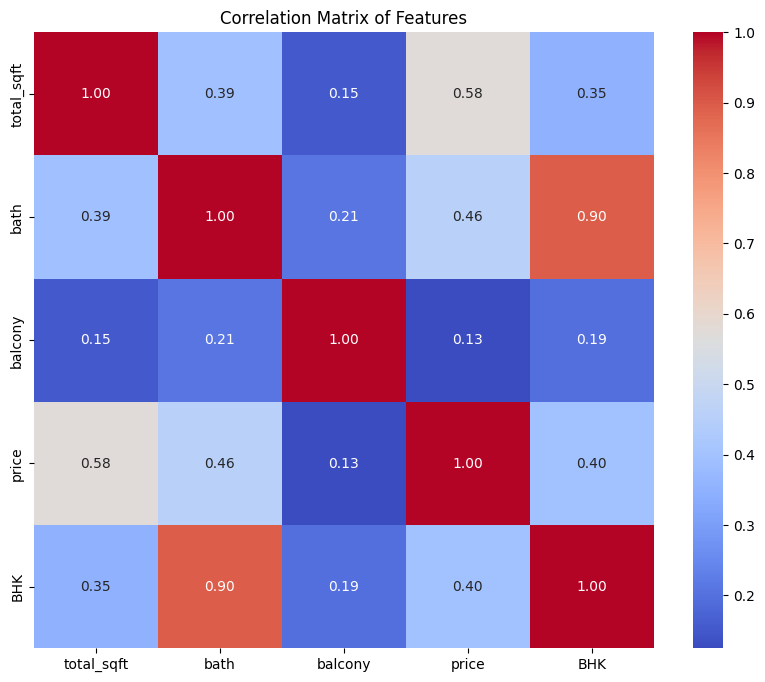

In [48]:
# --- Correlation Matrix ---
# Calculate correlation matrix for numerical columns
# Select only numerical features for correlation calculation:
numerical_data = data.select_dtypes(include=np.number)

correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

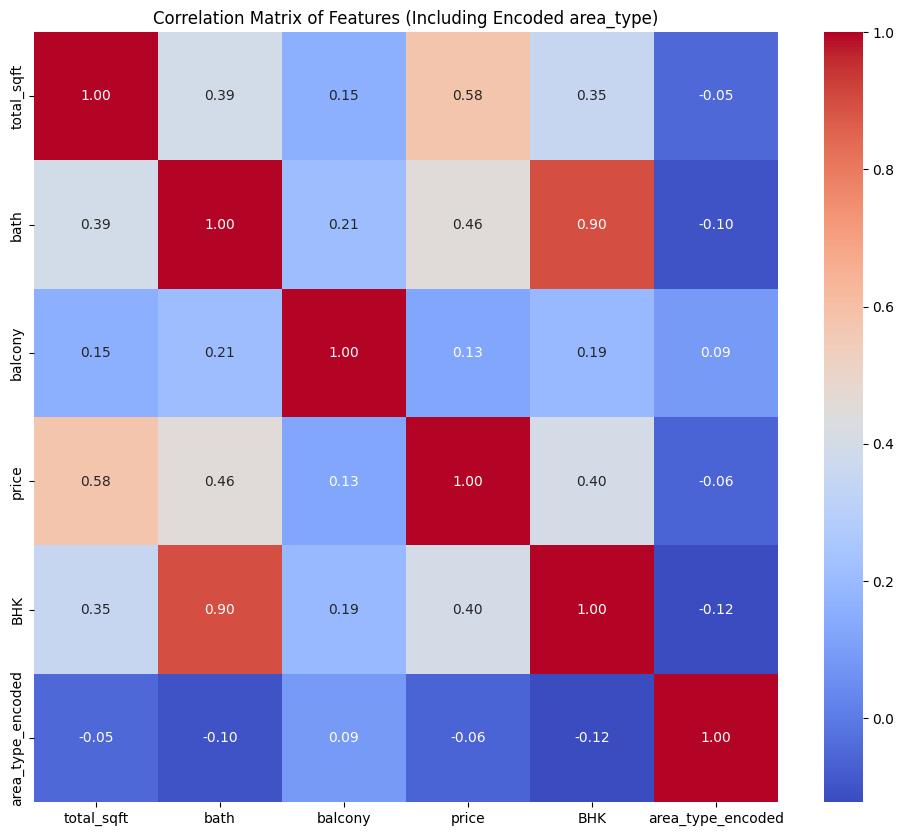

In [50]:
# --- Correlation Matrix with area_type converted to numerical ---
# Convert 'area_type' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'area_type' column
# Assuming 'area_type' is a column in your DataFrame 'data'
data['area_type_encoded'] = le.fit_transform(data['area_type'])

# Select only numerical features for correlation calculation, including the encoded 'area_type'
numerical_data = data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features (Including Encoded area_type)')
plt.show()
